In [ ]:
from kg_extract.doc_handle import RuDocHandle

document = RuDocHandle('test.docx')
data = document.get_proper_nouns()

In [ ]:
from docx import Document

rId = ''
document = Document('test.docx')
for inline_shape in document.inline_shapes:
    blip = inline_shape._inline.graphic.graphicData.pic.blipFill.blip
    print(blip.embed)
    rId = blip.embed

In [ ]:
import zipfile
import os

def extractimgs(docxpath, dstpath):
    doc = zipfile.ZipFile(docxpath)
    for info in doc.infolist():
        if info.filename.endswith((".png", ".jpeg", ".jpg", ".gif", ".emf")):
            doc.extract(info.filename, dstpath)
    doc.close()

# unzip test.docx -d images
extractimgs('test.docx', "images")

In [ ]:
import docx
import pandas as pd
import numpy as np

# Load the first table from your document. In your example file,
# there is only one table, so I just grab the first one.
document = docx.Document('test.docx')
table = document.tables[2]

ls =[]
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            ls.append(paragraph.text)
            
def Doctable(ls, row, column):
    df = pd.DataFrame(np.array(ls).reshape(row,column))  #reshape to the table shape
    new = docx.Document()
    word_table =new.add_table(rows = row, cols = column)
    for x in range(0,row,1):
        for y in range(0,column,1):
            cell = word_table.cell(x,y)
            cell.text = df.iloc[x,y]

    return new, df



In [ ]:
data.to_csv('./man.csv',index=False)

In [ ]:
from kg_extract.ner import RuNer

document = RuNer('en_core_web_sm', 'test.docx')

In [ ]:
data = document.get_sentences_ner()

In [ ]:
proper_nouns = list(pd.read_csv('proper_nouns.csv')['proper_nouns_name'].values)
proper_nouns

In [ ]:
temp = 'On the downlink path, the Digital Subsystem DU receives information through the Transport Network interface and uses Baseband signal processing to encode the data as IQ modulated digital data to meet the requirements of the antenna interface (AI)'.split(' ')
set(proper_nouns).intersection(set(temp))

In [ ]:
data.to_csv('./man.csv',index=False)

In [ ]:
from kg_process.es import Ru_es

es = Ru_es("http://localhost:7474",auth=("neo4j","test"))
es.insert()

In [ ]:
es.insert()

In [ ]:
from datetime import datetime
from elasticsearch import Elasticsearch
es = Elasticsearch([{'host':'localhost','port':9200}])

doc = {
    's': '',
    'p': '',
    'o': '',
    'key_words': [],
    'timestamp': datetime.now(),
}
# res = es.index(index="test-index", id=1, body=doc)
# print(res['result'])

In [ ]:
graph_data = pd.read_csv('man.csv')
for i in range(0, len(graph_data)):
    doc['s'] = graph_data['s'][i]
    doc['p'] = graph_data['p'][i]
    doc['o'] = graph_data['o'][i]
    doc['key_words'] = eval(graph_data['key_words'][i])
    doc['timestamp'] = datetime.now()
    es.index(index="doc", doc_type='Radio Application Architecture Description', body=doc)

In [ ]:
# res = es.get(index="test-index", id=1)
# print(res['_source'])

# es.indices.refresh(index="test-index")

res = es.search(index="doc", doc_type='Radio Application Architecture Description', 
                body={
                        "query": {
                            "match": {
                                "o": {      
                                    "query":    "RBS 3GPP",
                                    "operator": "and"
                                }
                            }
                        }
                    }
               )
# print("Got %d Hits:" % res['hits']['total']['value'])
# for hit in res['hits']['hits']:
#     print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])

In [ ]:
from pptx import Presentation

prs = Presentation('test.pptx')
prs.slides[5].export("the_new_path-file.jpg", "JPG")

# text_runs will be populated with a list of strings,
# one for each text run in presentation
# text_runs = []

# for slide in prs.slides:
#     for shape in slide.shapes:
#         if not shape.has_text_frame:
#             continue
#         for paragraph in shape.text_frame.paragraphs:
#             for run in paragraph.runs:
#                 text_runs.append(run.text)

In [ ]:
pic = prs.slides[5]
with open('mypic.jpg', 'wb') as f:
    f.write(pic.image.blob)

In [ ]:
from PIL import Image
from io import BytesIO


# Convert the corrected list to "bytes", wrap in BytesIO and ask PIL to open as PIL Image
pImage = Image.open(BytesIO(bytes(pic.background.element)))

# Now we can display it
pImage.show() 

# Or save it
pImage.save('result.jpg')

In [ ]:
import win32com
import win32com.client

Application = win32com.client.Dispatch("PowerPoint.Application")

Presentation = Application.Presentations.Open(r"C:\Users\eeeinld\PycharmProjects\test_ui\test.pptx", WithWindow=False)
Presentation.Slides[5].Export(r"C:\Users\eeeinld\PycharmProjects\test_ui\test.jpg", "JPG")
Application.Quit()

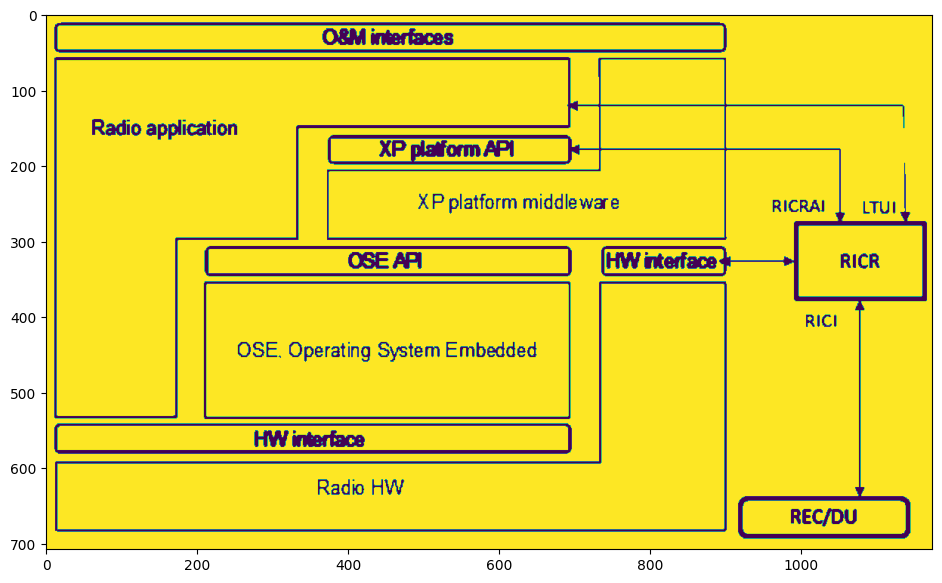

In [49]:
import matplotlib.pyplot as plt  
from PIL import Image
import cv2

# load the input image and grab the image dimensions
image = cv2.imread('image3.png', cv2.IMREAD_GRAYSCALE)

(origH, origW) = image.shape[:2]
(newW, newH) = (origW*2, origH*2)
image = cv2.resize(image, (newW, newH))

# define a threshold, 128 is the middle of black and white in grey scale
thresh = 170
# assign blue channel to zeros
image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]

cv2.imwrite('black-and-white.png',image)

plt.rcParams['figure.figsize'] = (newW/100, newH/100) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 100 #分辨率

plt.imshow(image)

In [54]:
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'tesseract'
# Example of adding any additional options.
custom_oem_psm_config = r'--oem 1 --psm 7'

# Simple image to string
# print(pytesseract.image_to_string(image, config=custom_oem_psm_config))
print(pytesseract.image_to_boxes(Image.open('image10.png'), config=custom_oem_psm_config))


i 9 84 15 88 0
d 7 90 15 95 0
e 9 97 15 102 0
a 9 103 15 108 0
s 9 110 17 115 0
a 9 119 15 123 0
a 9 124 15 129 0
‘ 9 132 15 133 0
A 9 134 15 140 0
A 9 141 15 144 0
a 9 146 15 150 0
s 9 152 17 157 0
a 9 161 15 165 0
; 9 166 17 170 0
‘ 9 172 15 173 0
A 9 175 15 178 0
m 9 180 17 191 0
~ 29 271 195 276 0
M 52 257 60 265 0
m 61 257 74 265 0
u 76 257 81 263 0
l 83 257 85 265 0
e 87 257 93 263 0
M 95 257 103 265 0
a 105 257 110 263 0
l 111 257 113 263 0
n 114 257 119 263 0
w 122 257 135 265 0
m 136 257 145 264 0
r 146 257 149 263 0
d 146 257 158 265 0
l 159 257 161 265 0
a 159 257 171 265 0
~ 29 250 195 255 0
~ 29 227 195 232 0
~ 28 211 31 274 0
~ 193 211 196 274 0
~ 29 209 195 214 0
~ 560 271 725 276 0
M 595 257 603 265 0
m 604 257 617 265 0
u 619 257 624 263 0
l 626 257 628 265 0
e 630 257 636 263 0
s 637 257 643 265 0
u 644 257 649 263 0
b 650 257 656 265 0
ﬁ 656 255 662 256 0
o 661 257 671 265 0
r 672 257 675 263 0
l 676 257 678 265 0
A 681 257 688 265 0
~ 560 245 725 250 0
~ 560 227 725